# Install dependencies

In [1]:
# Install deps

%pip install kaggle ultralytics 

Note: you may need to restart the kernel to use updated packages.


# Download dataset

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_files(
    dataset="norbertelter/pcb-defect-dataset",
    quiet=False,
    unzip=True,
)

100%|██████████| 1.10G/1.10G [02:41<00:00, 7.32MB/s]


In [2]:
# List files
from glob import glob
import pandas as pd
    
dataset_train_files = glob('pcb-defect-dataset/train/images/**.jpg')
df = pd.DataFrame(data={'File': dataset_train_files})
df

,File
0,pcb-defect-dataset/train/images/light_12_short...
1,pcb-defect-dataset/train/images/rotation_270_l...
2,pcb-defect-dataset/train/images/rotation_270_l...
3,pcb-defect-dataset/train/images/rotation_270_l...
4,pcb-defect-dataset/train/images/rotation_90_li...
...,...
8529,pcb-defect-dataset/train/images/rotation_270_l...
8530,pcb-defect-dataset/train/images/rotation_90_li...
8531,pcb-defect-dataset/train/images/light_12_spur_...
8532,pcb-defect-dataset/train/images/l_light_05_sho...


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_images(images, width, height, columns=2, rows=3):
    fig = plt.figure(figsize=(width, height))
    for i, file in enumerate(images):
        img = plt.imread(file)
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(img)
    plt.show()

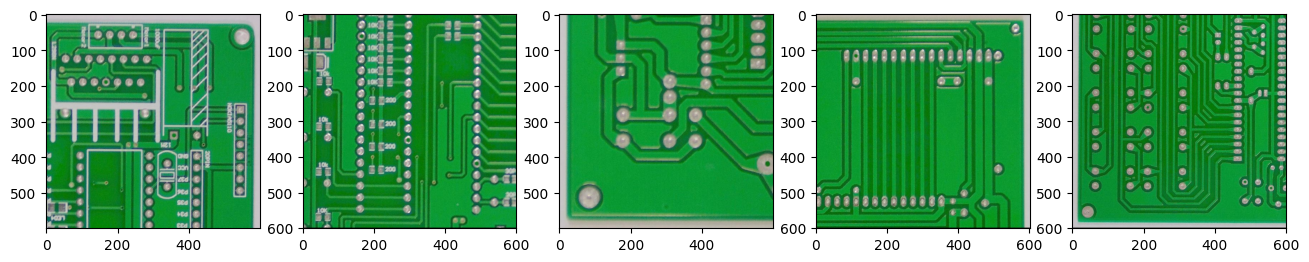

In [4]:
# Show sample

dataset_sample = glob('pcb-defect-dataset/train/images/*missing*.jpg')[:5]

plot_images(dataset_sample, width=16, height=8, columns=5, rows=1)

# Training

In [5]:
EPOCHS = 50
BATCH_SIZE = 8
IMAGE_RESOLUTION = 640

In [6]:
from ultralytics import RTDETR

# Load the pretrained model
model = RTDETR('rtdetr-x.pt')

100%|██████████| 131M/131M [00:46<00:00, 2.92MB/s] 


In [9]:
# Training the model
results = model.train(
   data='pcb-defect-dataset/data.yaml',
   imgsz=IMAGE_RESOLUTION,
   epochs=EPOCHS,
   batch=BATCH_SIZE,
   name='pcb_model'
)

Ultralytics YOLOv8.0.154 🚀 Python-3.10.0 torch-2.0.1 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=pcb-defect-dataset/data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8x_pcb, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

Freezing layer 'model.22.dfl.conv.weight'
train: Scanning /Users/norbert.elter/private/pcb-ai/pcb-defect-dataset/train/labels... 6370 images, 2164 backgrounds, 0 corrupt: 100%|██████████| 8534/8534 [00:01<00:00, 4480.08it/s]
train: New cache created: /Users/norbert.elter/private/pcb-ai/pcb-defect-dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /Users/norbert.elter/private/pcb-ai/pcb-defect-dataset/val/labels... 802 images, 264 backgrounds, 0 corrupt: 100%|██████████| 1066/1066 [00:00<00:00, 4722.46it/s]
val: New cache created: /Users/norbert.elter/private/pcb-ai/pcb-defect-dataset/val/labels.cache
Plotting labels to runs/detect/yolov8x_pcb3/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader 

KeyboardInterrupt: 

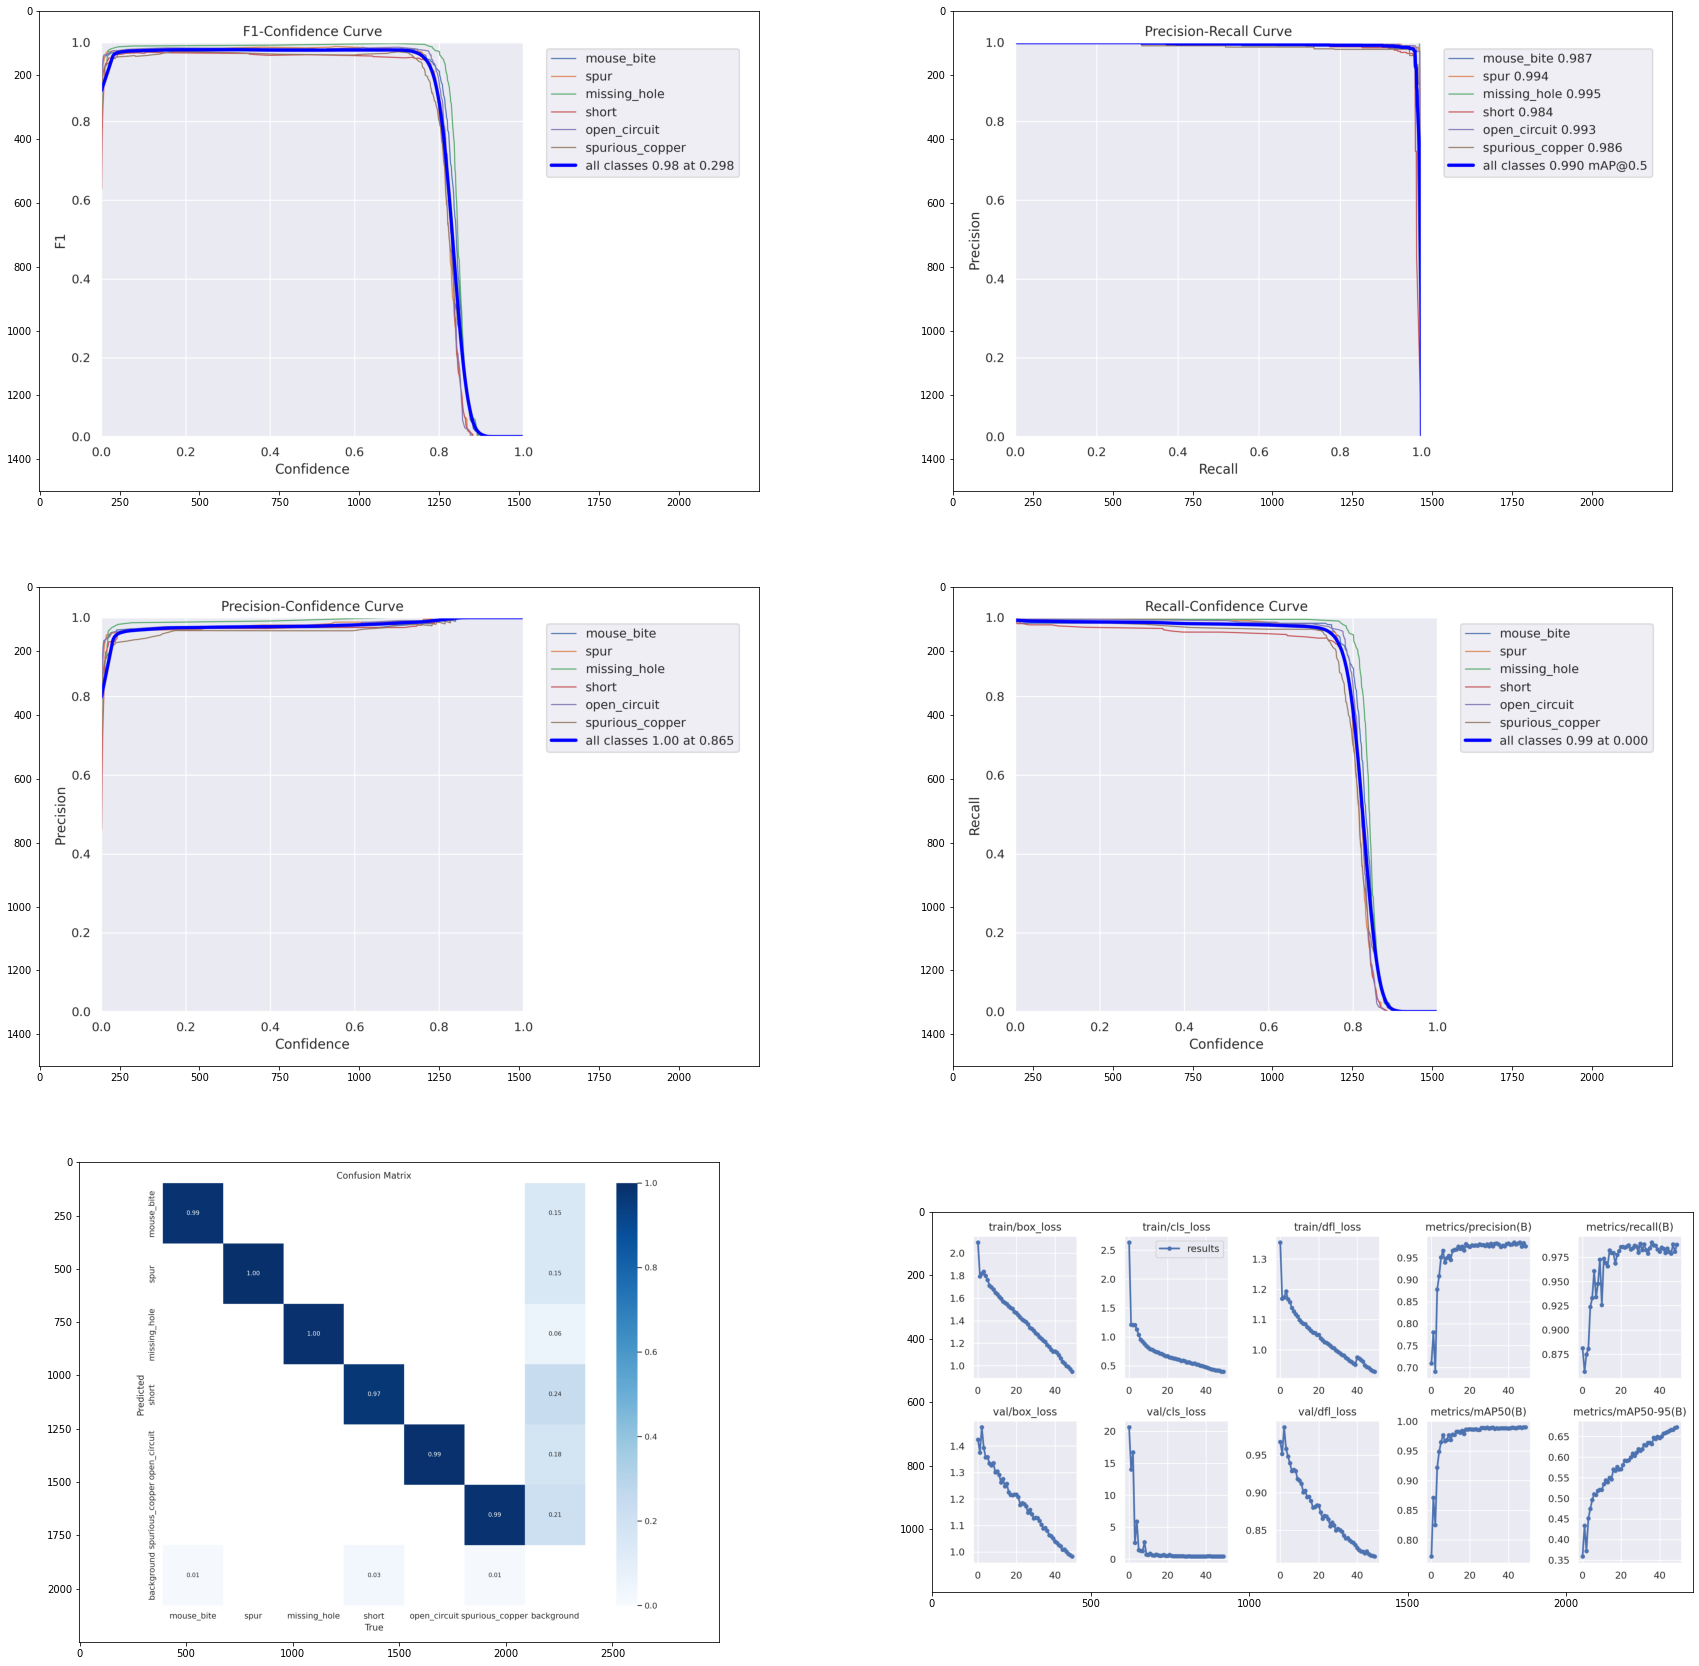

                  epoch,         train/box_loss,         train/cls_loss,         train/dfl_loss,   metrics/precision(B),      metrics/recall(B),       metrics/mAP50(B),    metrics/mAP50-95(B),           val/box_loss,           val/cls_loss,           val/dfl_loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      0,                 2.0958,                 2.6327,                 1.3551,                0.70961,                0.88141,                0.77208,                0.35885,                 1.4246,                 20.645,                0.96765,               0.070028,              0.0033302,              0.0033302
                      1,                 1.7934,                 1.2121,                 1.1689,                0.78054,                0.85698,                0.87133,                0.43365,                 1.3746,                 14.038,                0.95128,               0.039896,              0.0065316,              0.

In [4]:
# Show results

model_path = './pcb_model'

curves = [f'{model_path}/F1_curve.png', f'{model_path}/PR_curve.png', f'{model_path}/P_curve.png', f'{model_path}/R_curve.png', f'{model_path}/confusion_matrix.png', f'{model_path}/results.png']

plot_images(curves, width=30, height=30, columns=2, rows=3)

with open(f'{model_path}/results.csv') as f:
    file_contents = f.read()
    print(file_contents)

test_batch = [f'{model_path}/val_batch0_pred.jpg', f'{model_path}/val_batch1_pred.jpg', f'{model_path}/val_batch2_pred.jpg']
plot_images(test_batch, width=30, height=30, columns=3, rows=1)

# Testing

## Load the model

In [1]:
from ultralytics import YOLO

model = YOLO(model='./pcb_model/weights/best.pt', task='detect')

## Test detection


image 1/1 /Users/norbert.elter/private/pcb-ai/pcb-defect-dataset/test/images/l_light_01_missing_hole_04_2_600.jpg: 640x640 2 missing_holes, 509.7ms
Speed: 0.7ms preprocess, 509.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


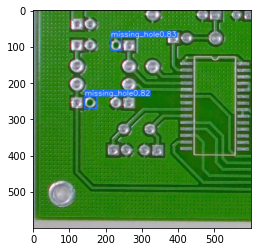

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

predictions = model.predict('./pcb-defect-dataset/test/images/l_light_01_missing_hole_04_2_600.jpg')

for prediction in predictions:
    img = prediction.plot()
    plt.imshow(img)
    plt.show()